# PREDICTION DES RETARDS DE VOL

## 1. IMPORT DES LIBRAIRIES

In [1]:
import pandas as pd
import numpy as npimport 
from os.path import join as join

import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns



## 2. CHARGEMENT DES DONNÉES

In [3]:
#df_data = pd.read_csv(join('data','2016_01.csv'))

# Load all CSVs into the "dfs" variable
dfs = []

for month in range(1, 13):
    file = f"fastapi_app/data/2016_{month:02}.csv"
    try:
        tmp = pd.read_csv(file, on_bad_lines='warn', low_memory=False)
        dfs.append(tmp)
        print(f"Loaded {file} ✅")
    except pd.errors.ParserError as e:
        print(f"ParserError for {file}: {e}")
    print("-" * 50)

# Concat all dataframes in "full_df"
df_data = pd.concat(dfs, ignore_index=True)

print(f"Total rows in full_df: {len(df_data)}")



Loaded fastapi_app/data/2016_01.csv ✅
--------------------------------------------------
Loaded fastapi_app/data/2016_02.csv ✅
--------------------------------------------------
Loaded fastapi_app/data/2016_03.csv ✅
--------------------------------------------------


/var/folders/p1/30319fqx0mx0937ql_lzckc40000gn/T/ipykernel_95086/1541586249.py:9: ParserWarning: Skipping line 121012: expected 65 fields, saw 75
Skipping line 386249: expected 65 fields, saw 83
Skipping line 388291: expected 65 fields, saw 78
Skipping line 389371: expected 65 fields, saw 72
Skipping line 389548: expected 65 fields, saw 81
Skipping line 453858: expected 65 fields, saw 97

  tmp = pd.read_csv(file, on_bad_lines='warn', low_memory=False)


Loaded fastapi_app/data/2016_04.csv ✅
--------------------------------------------------
Loaded fastapi_app/data/2016_05.csv ✅
--------------------------------------------------
Loaded fastapi_app/data/2016_06.csv ✅
--------------------------------------------------
Loaded fastapi_app/data/2016_07.csv ✅
--------------------------------------------------
Loaded fastapi_app/data/2016_08.csv ✅
--------------------------------------------------
Loaded fastapi_app/data/2016_09.csv ✅
--------------------------------------------------
Loaded fastapi_app/data/2016_10.csv ✅
--------------------------------------------------
Loaded fastapi_app/data/2016_11.csv ✅
--------------------------------------------------
Loaded fastapi_app/data/2016_12.csv ✅
--------------------------------------------------
Total rows in full_df: 5635978


In [4]:
df_filtered = df_data.drop_duplicates()

print(f"Total rows after drop_duplicates : {len(df_filtered)}")


# liste blanche des colonnes
df_filtered = df_filtered[[
    "YEAR",
#    "QUARTER",
    "MONTH",
    "DAY_OF_MONTH",
    "DAY_OF_WEEK",
#    "FL_DATE",
#    "UNIQUE_CARRIER",
    "AIRLINE_ID",
#    "CARRIER",
#    "TAIL_NUM",
#    "FL_NUM",
    "ORIGIN_AIRPORT_ID",
#    "ORIGIN_AIRPORT_SEQ_ID",
#    "ORIGIN_CITY_MARKET_ID",
#    "ORIGIN",
#    "ORIGIN_CITY_NAME",
#    "ORIGIN_STATE_ABR",
#    "ORIGIN_STATE_FIPS",
#    "ORIGIN_STATE_NM",
#    "ORIGIN_WAC",
    "DEST_AIRPORT_ID",
#    "DEST_AIRPORT_SEQ_ID",
#    "DEST_CITY_MARKET_ID",
#    "DEST",
#    "DEST_CITY_NAME",
#    "DEST_STATE_ABR",
#    "DEST_STATE_FIPS",
#    "DEST_STATE_NM",
#    "DEST_WAC",
    "CRS_DEP_TIME",
#    "DEP_TIME",
    "DEP_DELAY",
#    "DEP_DELAY_NEW",
#    "DEP_DEL15",
#    "DEP_DELAY_GROUP",
    "DEP_TIME_BLK",
#    "TAXI_OUT",
#    "WHEELS_OFF",
#    "WHEELS_ON",
#    "TAXI_IN",
    "CRS_ARR_TIME",
#    "ARR_TIME",
#    "ARR_DELAY",
#    "ARR_DELAY_NEW",
    "ARR_DEL15",
#   "ARR_DELAY_GROUP",
    "ARR_TIME_BLK",
#    "CANCELLED",
#   "CANCELLATION_CODE",
#    "DIVERTED",
    "CRS_ELAPSED_TIME",
#    "ACTUAL_ELAPSED_TIME",
#    "AIR_TIME",
    ]]

# on supprime les lignes avec des valeurs manquantes (constatées sur les colonnes de retard au départ et de retard à l'arrivée)
df_filtered = df_filtered.dropna(subset=['DEP_DELAY', 'ARR_DEL15'])

Total rows after drop_duplicates : 5635978


## 3. EXPLORATION DES DONNÉES

In [ ]:
# matrix avant filtres est TROP consommateur de CPU


# matrix pour les données manquantes
# voir png généré plot.png
#fig = msno.matrix(df_data)
#fig_copy = fig.get_figure()
#fig_copy.savefig('plot.png', bbox_inches = 'tight')


In [5]:

print ("Info après filtre :")
print(df_filtered.info())

Info après filtre :
<class 'pandas.core.frame.DataFrame'>
Index: 5556197 entries, 0 to 5635977
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   YEAR               object 
 1   MONTH              int64  
 2   DAY_OF_MONTH       object 
 3   DAY_OF_WEEK        object 
 4   AIRLINE_ID         int64  
 5   ORIGIN_AIRPORT_ID  object 
 6   DEST_AIRPORT_ID    object 
 7   CRS_DEP_TIME       float64
 8   DEP_DELAY          float64
 9   DEP_TIME_BLK       object 
 10  CRS_ARR_TIME       float64
 11  ARR_DEL15          float64
 12  ARR_TIME_BLK       object 
 13  CRS_ELAPSED_TIME   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 635.9+ MB
None


In [ ]:

print ("Describe après filtre :")
print(df_filtered.describe())


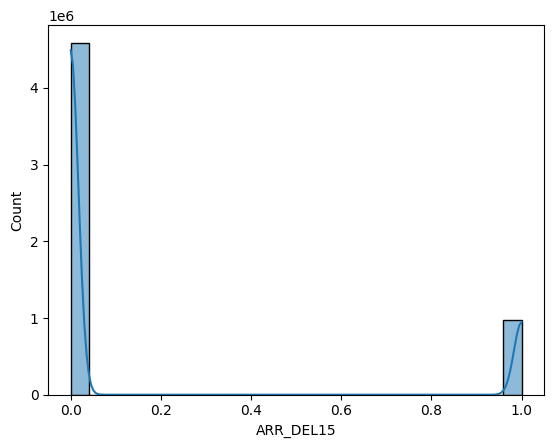

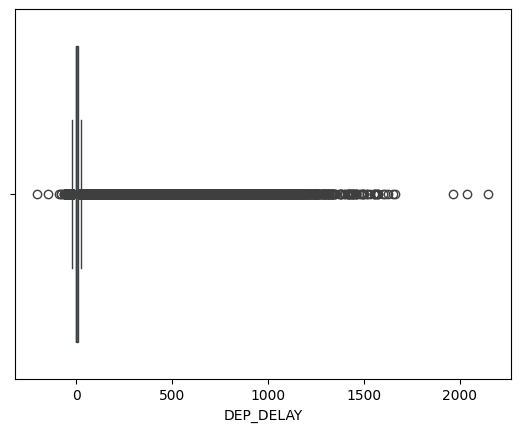

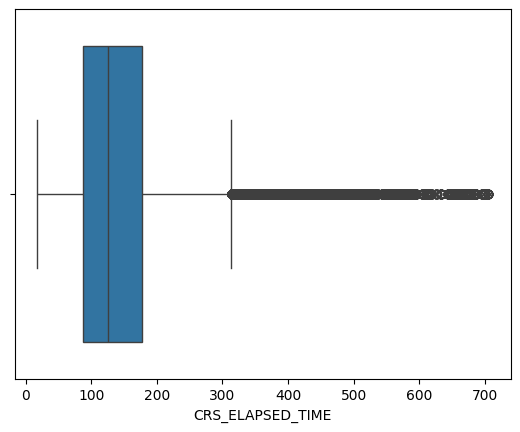

In [7]:
#analyse des données avec sns
# histplot pour analyser les données
sns.histplot(df_filtered['ARR_DEL15'], kde=True)
plt.show()

# Boxplot pour détecter les outliers
sns.boxplot(x=df_filtered['DEP_DELAY'])
plt.show()
sns.boxplot(x=df_filtered['CRS_ELAPSED_TIME'])
plt.show()


In [6]:

# on supprime la ligne que l'on a identifé comme incohérente
# Filtrer les lignes où le mois est supérieur à 12
df_filtered = df_filtered[df_filtered['MONTH'] < 13]

print(f"Nombre de vol dans df_filtered: {len(df_filtered)}")
print(f"Nombre de vol en retard à l'arrivée: {len(df_filtered[df_filtered.ARR_DEL15 == 1]) * 100 / len(df_filtered)} %")


Nombre de vol dans df_filtered: 5556196
Nombre de vol en retard à l'arrivée: 17.42991067989682 %


In [ ]:
# on va créer une liste d'aéroport
df_aeroport_orig = df_data[[
    "ORIGIN_AIRPORT_ID",
#    "ORIGIN_AIRPORT_SEQ_ID",
    "ORIGIN_CITY_MARKET_ID",
    "ORIGIN",
    "ORIGIN_CITY_NAME",
    "ORIGIN_STATE_ABR",
    "ORIGIN_STATE_FIPS",
    "ORIGIN_STATE_NM",
    "ORIGIN_WAC",
]]
df_aeroport_dest = df_data[[
    "DEST_AIRPORT_ID",
#    "DEST_AIRPORT_SEQ_ID",
    "DEST_CITY_MARKET_ID",
    "DEST",
    "DEST_CITY_NAME",
    "DEST_STATE_ABR",
    "DEST_STATE_FIPS",
    "DEST_STATE_NM",
    "DEST_WAC",
]]
df_aeroport_orig = df_aeroport_orig.drop_duplicates()
df_aeroport_dest = df_aeroport_dest.drop_duplicates()
# Renommer la colonne
df_aeroport_orig = df_aeroport_orig.rename(columns={'ORIGIN_AIRPORT_ID': 'AIRPORT_ID', 'ORIGIN_CITY_MARKET_ID': 'CITY_MARKET_ID', 'ORIGIN': 'ORIGIN', 'ORIGIN_CITY_NAME': 'CITY_NAME', 'ORIGIN_STATE_ABR': 'STATE_ABR', 'ORIGIN_STATE_FIPS': 'STATE_FIPS', 'ORIGIN_STATE_NM': 'STATE_NM', 'ORIGIN_WAC': 'WAC'})
df_aeroport_dest = df_aeroport_dest.rename(columns={'DEST_AIRPORT_ID': 'AIRPORT_ID', 'DEST_CITY_MARKET_ID': 'CITY_MARKET_ID', 'DEST': 'ORIGIN', 'DEST_CITY_NAME': 'CITY_NAME', 'DEST_STATE_ABR': 'STATE_ABR', 'DEST_STATE_FIPS': 'STATE_FIPS', 'DEST_STATE_NM': 'STATE_NM', 'DEST_WAC': 'WAC'})


df_all_aeroport = pd.merge(df_aeroport_dest, df_aeroport_orig).drop_duplicates()
df_all_aeroport = df_all_aeroport.reset_index(drop=True)

print(f"Nombre d'aéroport dans df_all_aeroport: {len(df_all_aeroport)}")




In [ ]:
# on va créer une liste de conpagnie aérienne
df_compagnie = df_data[[
    "AIRLINE_ID",
    "UNIQUE_CARRIER",
    "CARRIER"
]]
df_compagnie = df_compagnie.drop_duplicates()
df_compagnie = df_compagnie.reset_index(drop=True)

# on supprime les lignes avec des valeurs incohérentes
indexToDrop = df_compagnie[df_compagnie['AIRLINE_ID'] > 99999].index
df_compagnie = df_compagnie.drop(indexToDrop)

print(f"Nombre de compagnie dans df_compagnie: {len(df_compagnie)}")
print("Compagnies :")

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_compagnie)


## 4. VISUALISATIONS

Error in callback <function _draw_all_if_interactive at 0x11847e680> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

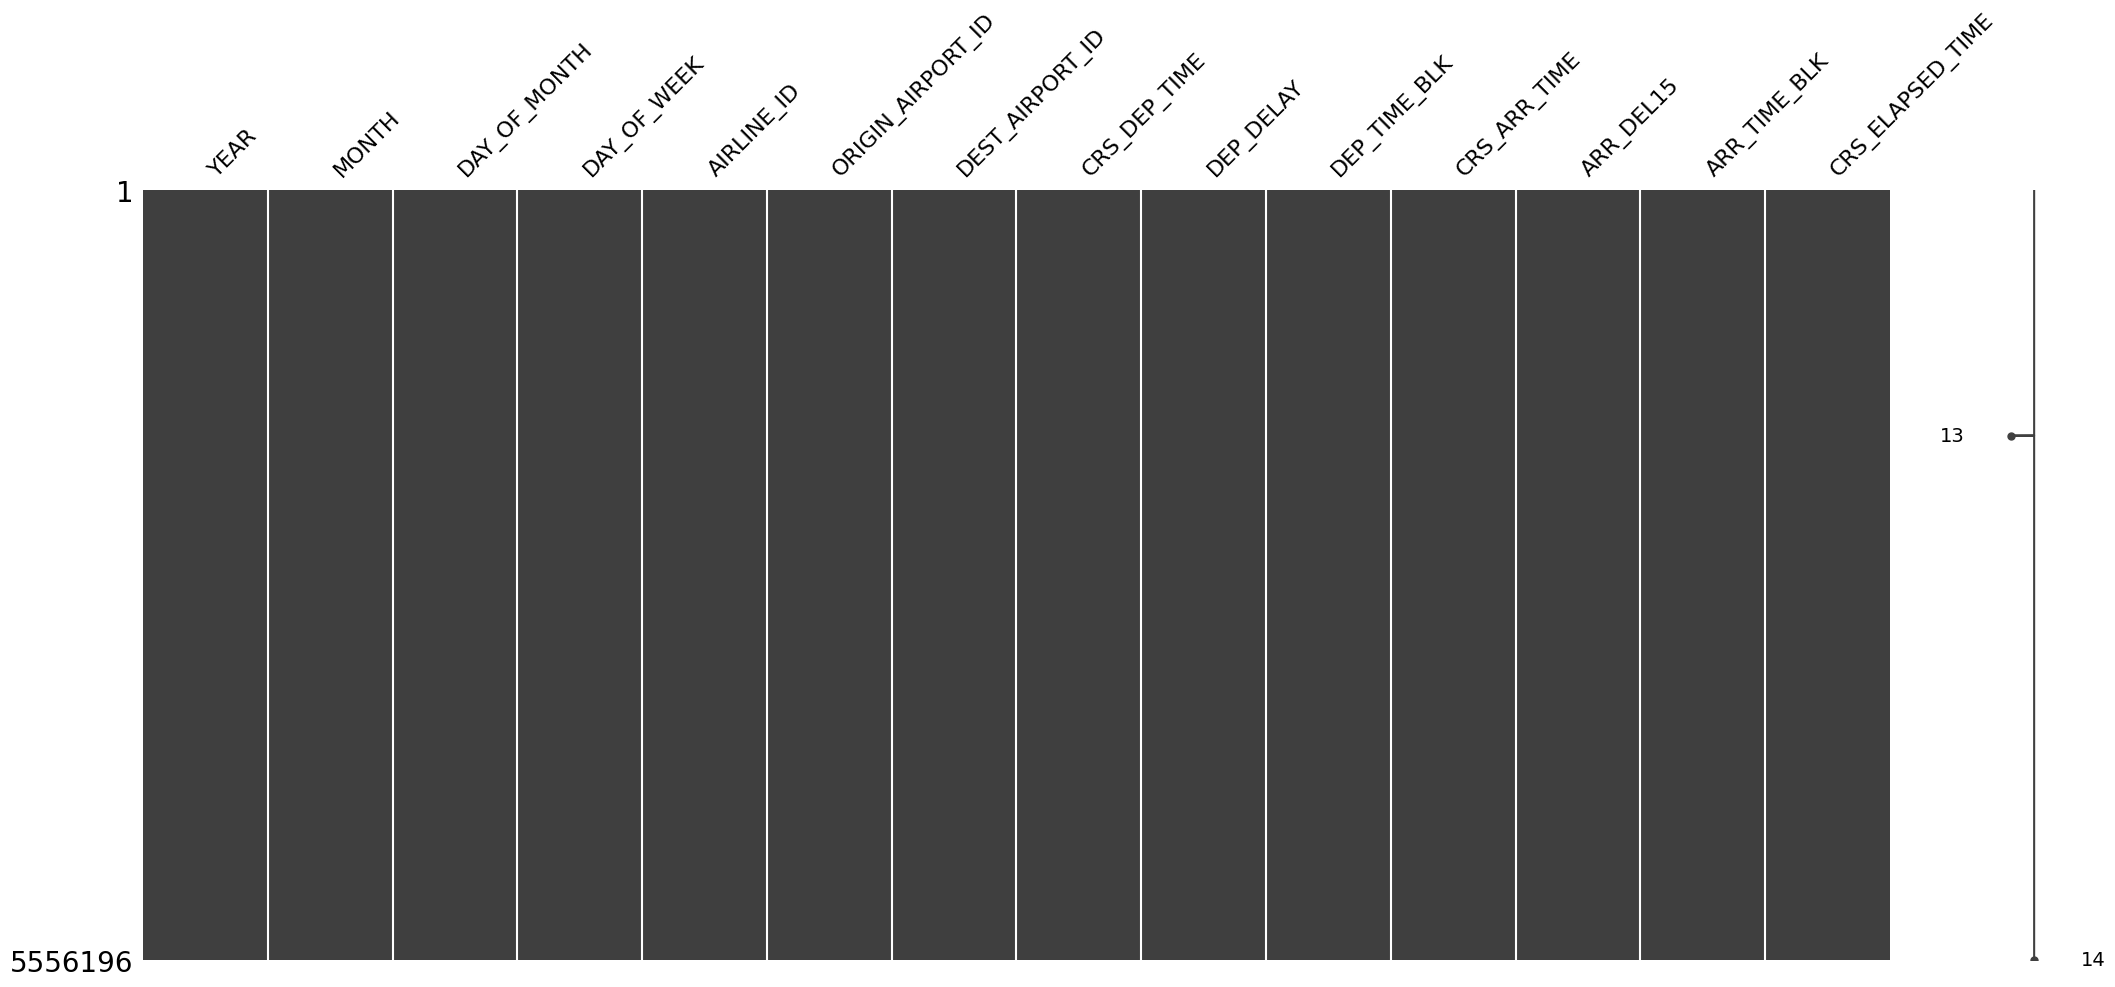

In [8]:
# matrix pour les données manquantes
# voir png généré plot.png
fig = msno.matrix(df_filtered)
fig_copy = fig.get_figure()
fig_copy.savefig('plot.png', bbox_inches = 'tight')

## 5.MODÉLISATION